# Le distribuzioni

Uno dei migliori modi per descrivere una variabile è quello di mostrare i valori che appaiono nel dataset e contare gli stessi.
Questo viene chiamato anche **distribuzione** di una variabile.

Il modo più semplice di rappresentare una distribuzione è attraverso l'uso di un istogramma, questo è un grafico che mostra la frequenza di ogni valore, in questo contesto per frequenza si intende il numero di volte che il valore si presenta.

In pyhton un modo efficiente per fare questo è tramite l'utilizzo di un dizionario, data una sequenza di valori t:

In [1]:
t = [1,2,2,3,4,5,5,6,7,7,7,8,9]

In [2]:
hist = {}
for x in t:
    hist[x] = hist.get(x,0) + 1

hist

{1: 1, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 3, 8: 1, 9: 1}

Questo codice conta il numero di occorrenze e restituisce la sua frequenza, alternativamente si può usare la classe `Counter` definita nel modulo `collections`

In [3]:
from collections import Counter
counter = Counter(t)
counter[7]

3

Che resituisce un oggetto di tipo `Counter` il quale si puo interrogare per avere la frequenza del valore voluto.
Un altra opzione può essere quella di usare il metodo `value_counts` fornito da pandas e usato già nella lezione precedente.

Torniamo al nostro problema "il primo bambino tende a nascere più tardi" come prima cosa carichiamo il dataset.

In [4]:
from utils import readReadFemPreg

preg = readReadFemPreg()
live = preg[preg.outcome == 1]

Analizziamo la distribuzione dei valori del peso del nascituro

(0.0, 3149.0)

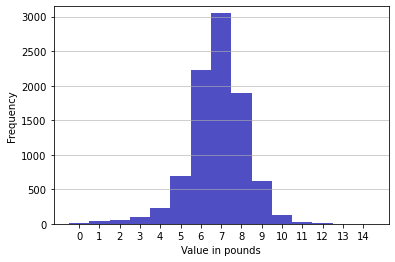

In [5]:
import matplotlib.pyplot as plt
import numpy as np

values = live.birthwgt_lb
xmin = live.birthwgt_lb.min()
xmax = live.birthwgt_lb.max()

n_bins = int(xmax-xmin)

n, bins, patches = plt.hist(x=values, bins=n_bins, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)

labels = [str(x) for x in range(n_bins)]
xs = np.arange(len(labels))
plt.xticks(xs+0.5, labels)

plt.xlabel('Value in pounds')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq) + 100)

La figura qui sopra mostra il risultato il valore più comune è chiamato **moda** che rappresenta il valore di 7 pounds 
La distribuzione dei valori assomiglia vagamente ad una campana, questa distribuzione si chiama **normale** oppure **gaussiana**. 
La campana però non è perfetta in quanto la coda di sinistra tende ad estendersi più a sinistra che a destra.

La figura sotto invece mostra l'istogramma del valore `birthwgt_oz` un pezzo del peso del nascituro, ci si aspetta che i valori siano distribuiti uniformemente (distribuzione **uniforme**) vediamo il risultato

(0.0, 1137.0)

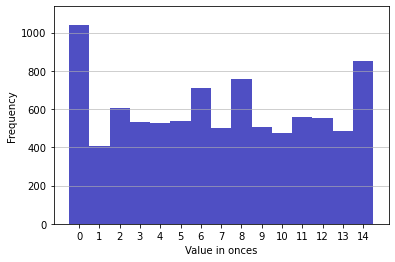

In [6]:
values = live.birthwgt_oz
xmin = values.min()
xmax = values.max()

n_bins = int(xmax-xmin)

n, bins, patches = plt.hist(x=values, bins=n_bins, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)

labels = [str(x) for x in range(n_bins)]
xs = np.arange(len(labels))
plt.xticks(xs+0.5, labels)

plt.xlabel('Value in onces')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq) + 100)

notiamo che il valore 0 tende ad essere più frequente, probabilmente perchè si tende ad approssimare il peso vicino ad un valore intero.

Andiamo ad analizzare l'età della madre alla data del parto.

Mode of pregnacy age 22.75


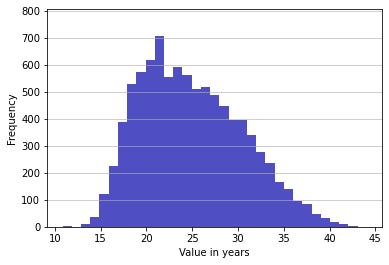

In [7]:
values = live.agepreg
xmin = values.min()
xmax = values.max()

n_bins = int(xmax-xmin)

n, bins, patches = plt.hist(x=values, bins=n_bins, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Value in years')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq) + 100)

mode = values.mode()[0]
print("Mode of pregnacy age {0}".format(mode))


La moda è sui 23 anni, la distribuzione ricorda vagamente una campana ma in questo caso si estende molto più a destra che a sinistra.

Passiamo ora ad analizzare il periodo di gestazione il valore più comune è di 39 settimane, la coda è piu lunga a sinistra di solito dopo 43 settimane i medici intervengono

Mode of pregnacy 39


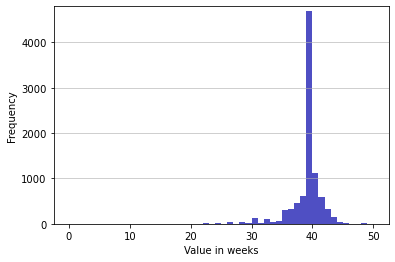

In [8]:
values = live.prglngth
xmin = values.min()
xmax = values.max()

n_bins = int(xmax-xmin)

n, bins, patches = plt.hist(x=values, bins=n_bins, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Value in weeks')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq) + 100)

mode = values.mode()[0]
print("Mode of pregnacy {0}".format(mode))

## outliers

Guardando gli istogrammi è molto facile identificare i valori comuni e la forma della distribuzione i valori più rari tuttavia non sono sempre facilemente visibili.
Prima di proseguire cerchiamo di capire se esistono dei valori estremi che potrebbero rappresentare errori di misura o eventi molto rari (**outliers**).

Controlliamo gli estremi di `prglngth`

In [9]:
num_values = 10
values = live.prglngth
counts = values.value_counts().sort_index(ascending=True) 

small = counts[:10]
small

0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

In [10]:
counts[-10:]

40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

Ragioniamo su questi dati, i valori sotto le 10 settimane sono improponibili, probabilmente si tratta di un errore nella gestione del flag `outcome`, i valori sopra le 30 settimane molto probabilmente corretti mentre tra le 10 e le 30 settimane potremmo sia avere degli errori sia avere delle nascite premature.

Stesso ragionamento potremmo farlo per i valori più grandi, molti dottori inducono il parto sopra le 42 settimane e personalmente il valore di 50 settimane sembra non corretto.

Il miglior modo per trattare gli outliers viene dalla "conoscenza del dominio", in questo esempio vogliamo concentrarci sulla domanda se il primo figlio tende a nascere primo o dopo.

In [11]:
firts = live[live.birthord == 1]
others = live[live.birthord > 1]

(27.0, 46.0)

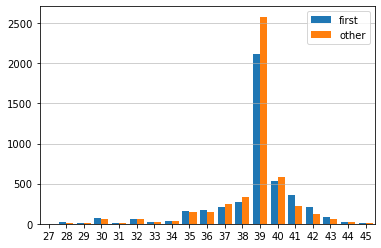

In [12]:
plt.hist([firts.prglngth, others.prglngth],histtype='bar',label=['first','other'],bins=n_bins)

labels = [str(x) for x in range(n_bins)]
xs = np.arange(len(labels))
plt.xticks(xs+0.5, labels)


plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.xlim(27, 46)

gli istrogrammi sono molto utili in quanto mostrano subito i valori più frequenti. Non sono però sempre la scelta migliore per comparare due distribuzioni. In questo esempio il campione dei primi bambini è più piccolo del secondo altri a alcune delle differenze date nel grafico potrebbero essere apparenti, nel prossimo capitolo affronteremo questo utilizzando la funzione di probabilità.

In [13]:
firts.prglngth.count()

4413

In [14]:
others.prglngth.count()

4735

## Riassumere una distribuzione

Un istogramma è una completa descrizione di una distribuzione di un campione.
Dato un istogramma possiamo costruire i valori del campione sebbene non nel loro ordine.

Se però dovessimo riassumere con dei valori della stessa possiamo utilizzare queste funzioni:
**tendenza centrale**: i valori tendono ad unirsi attorno ad un particolare punto?

**moda** esistono uno o più punti di accentramento

**spread** quanto sono variabili i valori?

**code** quanto la decade la probalilità di avere quel valore allontanandosi da una moda?

**outliers** quanto sono lontani i valori da una moda?


La statistica è pensata per rispondere a queste domande è chiamata **statistica descrittiva**. La misura di gran lunga più conosciuta è la media (mean) che descrive la tendenza centrale della distribuzione.

Se abbiamo un campione di $n$ valori $x_i$ la media $\overline{x}$ è la somma dei valori diviso il numero dei valori:

$$\overline{x} = \frac{1}{n}\sum_{i=1}^n{x_i}$$

La media è ottima per descrivere un insieme di valori. Per esempio le mele al supermercato hanno tutte lo stesso peso, se prendiamo 6 mele e le paghiamo 3€ in media abbiamo pagato una mela 0.50€. 

Ma con le zucche dobbiamo lavorare in un'altro modo supponiamo di avere più varietà nel nostro orto. Un giorno raccogliamo tutte le zucche 3 pesano un kilo due pesano 3 chili e una zucca di varietà Atlantic Giant pesa 300 kili.

Se vi dicessi che la media del peso delle zucche nel mio giardino è di 100 Kg, vi starei forviando. Questo perchè le zucche non sono tutte dello stesso tipo.

### La varianza

Tornando all'esempio di prima, la varianza ci aiuta a descrivere la variabilità o lo **spread** di una distribuzione.
La varianza di un insieme di valori si scrive come:

$$S^2=\frac{1}{n}\sum_{i=1}^n{(x_i - \overline{x})}^2$$

Il termine $(x_i - \overline{x})$ è anche chiamato "deviazione dalla media" dunque la varianza è la media della deviazione al quadrato. Se calcoliamo la radice quadrata di tale valore otteniamo la **deviazione standard**.

Pandas ci fornisce già le funzioni per calcolare questi valori:

In [15]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print("Pregnacy lenght in weeks {0:.2f} variance {1:.2f} standard {2:.2f}".format(mean,var,std))

Pregnacy lenght in weeks 38.56 variance 7.30 standard 2.70


Possiamo dunque dire che in media la gestazione dura 38.5 settimane con una deviazione di 2/3 settimane

### Altri tipi di media

Esistono per completezza anche altri tipi di medie ad esempio la **media troncata** elimina un numero fisso di elementi da entrami i lati della lista ordinata dei valori, questo tipo di media e meno influenzata dai valori estremi.

Un altro tipo di media è la media pesata che consite nel moltiplicare ciascun elemento della media $x_i$ per un peso $w_i$ e dividere il tutto per la somma dei pesi.

## Esplorare la distribuzione dei dati

### Quartili e BoxPlot
Un ulteriore approccio per la stima della dispersione dei dati è basato guardando i dati ordinati.
La parte della statistica che si occupa di questo tipo di analisi è anche chiamata statistica d'ordine.

La prima misura che possiamo fare è il **range** ovvero la differenza tra il valore più grande e quello più piccolo.
Questo tipo di misura però è molto sensibile agli outliers(valori anomali) e non risulta molto utile nella misura della dispersione dei dati.

Per evitare di essere influenzati da questi valori anomali, possiamo guardare l'intervallo dei dati dopo aver rimosso i valori da ciascuna estremità.

Formalmente questo tipo di stime sono basate su differenze tra *percentili*. 
In un insieme di dati il P-esimo percentile è un valore tale che almeno P percento dei valori assuma questo valore o meno e e almeno (100-P) percento dei valori assuma questo valore o più. 
Spiegniamo questa frase con un esempio pratico, per trovate l'80 percentile dobbiamo prima ordinare tutti i dati, poi partendo dal valore più piccolo procediamo fino a raggiungere l'80% verso il valore più grande.

Una misura comune di variabilità è la differenza tra il 25-esimo percentile e il 75-esimo percentile ed è chiamata anche **scarto interquartile** in inglese **interquartile range**. 
Anche qui facciamo un esempio prendiamo questo dataset:

In [29]:
values = [3,1,5,3,6,7,2,9]

come prima cosa dobbiamo ordinare i dati:

In [34]:
values.sort()
n = len(values)
print("La lista ha lunghezza {0}".format(n))
print(values)

La lista ha lunghezza 8
[1, 2, 3, 3, 5, 6, 7, 9]


il 25-esimo percentile sta alla posizione h = 2.25 ora come si vede questo non è un indice intero, la regola per calcolare il percentile corretto è:

* Se l'indice h è un valore intero si usa la formula $\frac{(Y_h + Y_{h+1})}{2}$
* altrimenti se h non è un valore intero si prende il volore $Y_{\lceil Y_h \rceil}$

In [35]:
import math

h = n * 0.25
print("Il primo quartile si trova alla posizione {0:.2f}".format(h))

#Gli indici di python partono da 0
h = h-1
h1 = math.ceil(h)


if int(h) != int(h1):
    print("Caso h non intero prendo come indice {0}".format(h1))
    q1 = values[h1]
else:
    print("Caso h intero prendo come indici {0} e {1}".format(h1,h1 + 1))
    q1 = (values[h1] + values[h1 + 1]) / 2
    
print("Il primo quartile ha valore {0:.2f}".format(q1))


Il primo quartile si trova alla posizione 2.00
Caso h intero prendo come indici 1 e 2
Il primo quartile ha valore 2.50


utilizziamo quanto visto per analizzare l'età delle mamme calcolando i percentili in questo modo

In [36]:
values = live.agepreg
values.quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    17.000
0.25    20.500
0.50    24.330
0.75    28.910
0.95    34.882
Name: agepreg, dtype: float64

il grafico boxplot è basato sui percentili e ci da una veloce visione di insieme della distribuzione dei dati

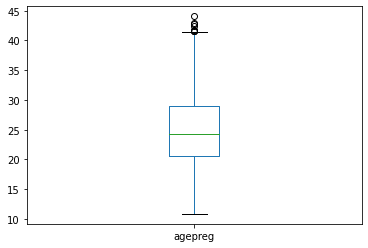

In [37]:
values.plot.box();

plt.show(block=True);

La parte alta e bassa della scatola sono rispettivamente il 75-esimo e il 25-esimo percentile mentre la linea arancione centrale è la mediana. I due baffi *whiskers* che si estendono sopra e sotto vengono calcolati estendendo lo stesso per il valore 1.5 * IQR tutti i dati al di fuori di questo intervallo vengono considerati ouliers e vengono visualizzati come singoli punti.